In [88]:
def readWordsFromWiki(filename):
    """
        opens a file which has one sentence or article per line (without punction marks)
        returns a list with all words 
    """
    f = open(filename)
    allWords=[]
    for line in f:
        line = line[:-1]
        words = line.split(" ")
        allWords.extend(words)
    return allWords


def readFirstWordsOfSentences(filename):
    """
        opens a file which has one sentence per line (without punction marks)
        returns a list with all words which occur as the first word of a sentence 
    """
    f = open(filename)
    allWords=[]
    for line in f:
        line = line[:-1]
        words = line.split(" ")[0]
        allWords.append(words)
    return allWords

def readCertainWords(filename, wordList):
    """
        opens a file which has one sentence per line (without punction marks)
        returns a list with all words which occur as the first word of a sentence 
    """
    f = open(filename)
    allWords=[]
    for line in f:
        line = line[:-1]
        words = line.split(" ")
        for w in words:
            if w in wordList:
                allWords.append(w)
    return allWords
    
def readContCountWords(filename, wordList):
    f = open(filename)
    allWords={w:[] for w in wordList}
    for line in f:
        line = line[:-1]
        words = line.split(" ")
        for i in range(0,len(words)-1):
            if words[i] in wordList:
                allWords[words[i]].append(words[i+1])
    s = 0
    for w in wordList:
        cnt = len(set(allWords[w]))
        allWords[w] = cnt
        s = s+cnt
    s = float(s)
    for w in wordList:
        allWords[w]=float(allWords[w])/s
    return allWords
    



In [39]:
from collections import Counter
filename = "../datasets/simple-20160801-lowercasewords-from-one-sentence-per-line"
allSimpleWords = readWordsFromWiki(filename)
allStartWords = readFirstWordsOfSentences(filename)
cetainSimpleWords = readCertainWords(filename, set(allStartWords))
contCountModel = readContCountWords(filename, set(allStartWords))

In [89]:
contCountModel = readContCountWords(filename, set(allStartWords))

In [41]:
print allSimpleWords[0:10], allStartWords[0:10], cetainSimpleWords[0:10]

 ['april', 'is', 'the', 'fourth', 'month', 'of', 'the', 'year', 'and', 'comes'] ['april', 'it', 'april', 'its', 'the', 'it', 'it', 'in', 'in', 'in'] ['april', 'is', 'the', 'fourth', 'month', 'of', 'the', 'year', 'and', 'comes']


In [42]:
print len(allSimpleWords), len(allStartWords), len(cetainSimpleWords), len(set(allSimpleWords)), len(set(allStartWords)), len(set(cetainSimpleWords))

13754664 756986 12652014 228559 58875 58875


In [43]:
c=Counter(allSimpleWords)
words,frequencies = zip(*c.most_common())
print words[0:10], frequencies[0:10]

('the', 'of', 'in', 'and', 'a', 'is', 'to', 'was', 'it', 'he') (951708, 432911, 417897, 344179, 339206, 286583, 242563, 188023, 137260, 107795)


In [52]:
import numpy as np
import math

In [48]:
c=Counter(allStartWords)
words,frequencies = zip(*c.most_common())
cumsum = np.cumsum(frequencies)[-1]
startmodel = {words[i]:float(frequencies[i])/cumsum for i in range(0,len(frequencies))}
print words[0:10], frequencies[0:10]

('the', 'it', 'he', 'in', 'they', 'this', 'she', 'a', 'there', 'his') (118699, 78366, 62382, 35404, 25749, 23578, 18920, 15577, 9884, 7274)


In [49]:
c=Counter(cetainSimpleWords)
words,frequencies = zip(*c.most_common())
cumsum = np.cumsum(frequencies)[-1]
uniModelOnStartWords = {words[i]:float(frequencies[i])/cumsum for i in range(0,len(frequencies))}
print words[0:10], frequencies[0:10]

('the', 'of', 'in', 'and', 'a', 'is', 'to', 'was', 'it', 'he') (951708, 432911, 417897, 344179, 339206, 286583, 242563, 188023, 137260, 107795)


In [59]:
uniformModel = {words[i]:1/float(len(words)) for i in range(0,len(frequencies))}

In [ ]:
# TODO: implement cont counter model and implement the averaged markov order 1 model that comes down to a unigram model

In [65]:
def kld(a,b):
    s = 0
    for k in a.keys():
        s = s + a[k] * math.log(a[k]/b[k])
    return s

def skld(a,b):
    return kld(a,b) + kld(b,a)

def kl_similarity(a,b):
    return math.exp(-1* skld(a,b))

In [62]:
print kld(startmodel,startmodel)
print kld(startmodel,uniModelOnStartWords) + kld(uniModelOnStartWords, startmodel)
print kld(uniformModel, uniModelOnStartWords) + kld(uniModelOnStartWords, uniformModel) 
print kld(uniformModel, startmodel) + kld(startmodel, uniformModel)

0.0
2.40543173034
7.01249655127
7.27956401893


In [67]:
print kl_similarity(startmodel, startmodel)
print kl_similarity(startmodel, uniModelOnStartWords)
print kl_similarity(uniformModel, uniModelOnStartWords)
print kl_similarity(uniformModel, startmodel)


1.0
0.0902265336676
0.000900557491631
0.000689486101063


In [119]:
start_cum = [0]
unigram_cum = [0]
uniform_cum = [0]
contCount_cum = [0]
idx = 0
#for w in sorted(d, key=d.get, reverse=True):
for k in sorted(startmodel, key=startmodel.get, reverse=True):
    start_cum.append(start_cum[idx] + startmodel[k])
    idx = idx +1
idx = 0
for k in sorted(uniModelOnStartWords, key=uniModelOnStartWords.get, reverse=True):
    unigram_cum.append(unigram_cum[idx] + uniModelOnStartWords[k])
    idx = idx +1
idx = 0
for k in sorted(uniformModel, key=uniformModel.get, reverse=True):
    uniform_cum.append(uniform_cum[idx] + uniformModel[k])
    idx = idx +1
idx = 0
for k in sorted(contCountModel, key=contCountModel.get, reverse=True):
    contCount_cum.append(contCount_cum[idx] + contCountModel[k])
    idx = idx +1

In [76]:
%matplotlib inline
import matplotlib
matplotlib.use('MacOSX')

import matplotlib.pyplot as plt
#latex support
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

#load customized stylesheet for plots
matplotlib.style.core.reload_library()
plt.style.use('presentation')

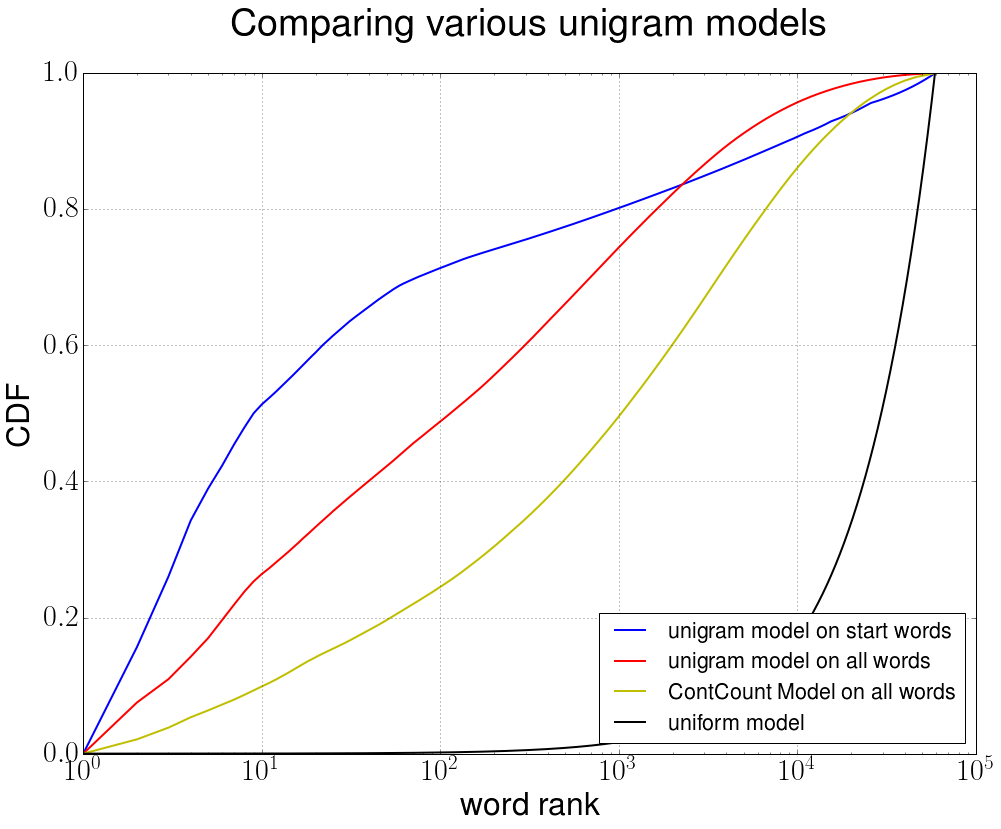

In [125]:
xvals = list(range(1,len(start_cum)+1))
plt.close()
plt.plot(xvals,start_cum,'b-', label = "unigram model on start words")
plt.plot(xvals,unigram_cum,'r-', label = "unigram model on all words")
plt.plot(xvals,contCount_cum,'y-', label = "ContCount Model on all words")
plt.plot(xvals,uniform_cum,'k-', label = "uniform model")


plt.title("Comparing various unigram models",y=1.05)
plt.xlabel("word rank")
plt.ylabel("CDF")
plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.ylim(0,1)
plt.legend(loc ='lower right')
plt.show()

In [129]:
#via: http://stackoverflow.com/questions/31416664/python-gini-coefficient-calculation-using-numpy
def calcGiniCoefficient(a,b):
    aa= np.trapz(a)
    ab= np.trapz(b)
    return abs(aa-ab)/ab

print calcGiniCoefficient(unigram_cum, uniform_cum)
print calcGiniCoefficient(start_cum, uniform_cum)
print calcGiniCoefficient(contCount_cum, uniform_cum)

print "TODO: gini coefficient (area) and order of produced ranking depends on the order of words on the x-axis. This is a problem"
# in theory it should only measure the inequality... 
print "therefor let us look at entropies" 

0.942869793783
0.892800310369
0.847492203609
TODO: gini coefficient (area) and order of produced ranking depends on the order of words on the x-axis. This is a problem
therefor let us look at entropies


In [115]:
def calcEntropy(model):
    H = 0
    for w in model:
        if model[w] > 0:
            H = H - model[w]*math.log(model[w],2)
    return H

def calcRelativeEntropy(model):
    return calcEntropy(model)/math.log(len(model.keys()),2)

In [116]:
print calcRelativeEntropy(uniformModel)
print calcRelativeEntropy(contCountModel)
print calcRelativeEntropy(uniModelOnStartWords)
print calcRelativeEntropy(startmodel)


1.0
0.791870094381
0.636526372755
0.514465066467


In [114]:
print math.log(len(frequencies),2)

15.8453675343


In [130]:
start_cum[0]=0